  #                 GRIP: The Sparks Foundation

## Data Science and Business Analytics Intern

## Author: Akshat Singh

##### In this task we have to predict the percentage score of a student based on the number of hours studied.The task has two varibles where the feature is the no. of hours studied and target values is the percentage score. This can be sloved using simple linear regression.

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Reading the Data from remote url

In [2]:
url = "http://bit.ly/w-data"
data=pd.read_csv(url)

##### Exporing Data

In [3]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Checking Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##### Checking for blank value

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### Checking for duplicated values

In [7]:
data.duplicated().sum()

0

##### Histogram for Hours

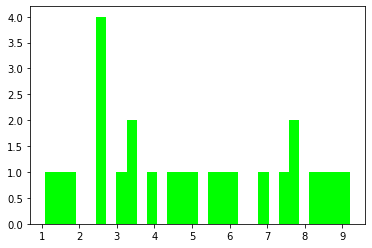

In [38]:
plt.hist(data.Hours,facecolor="#00FF00", bins = 30);

##### Total Unique Values for Scores

In [39]:
data.Scores.nunique()

23

##### Histrogram for Scores

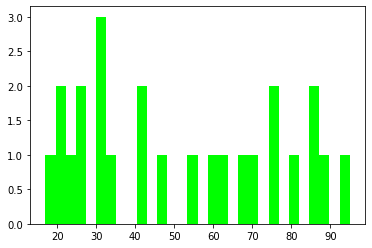

In [40]:
plt.hist(data.Scores,facecolor="#00FF00",bins=30);

##### Checking Data Distribution

Feature:  Hours


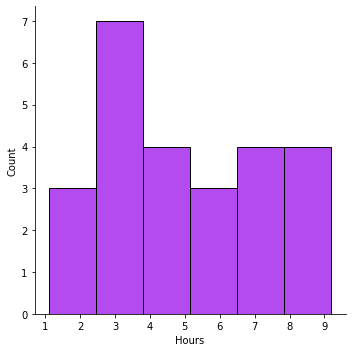

********************************************************************************************************************
Feature:  Scores


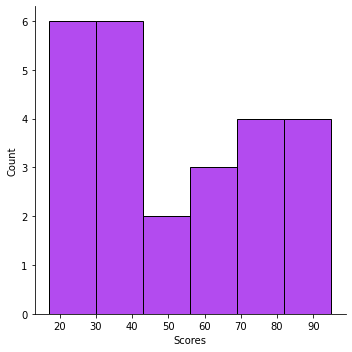

********************************************************************************************************************


In [58]:
for col in data.columns:
    print("Feature: ",col)
    sns.displot(data[col],color="#9A0EEA")
    plt.show()
    print("*"*116)

##### Checking realtionship between hours and scores

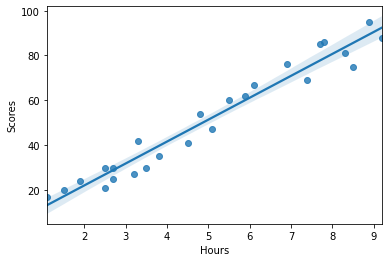

In [69]:
sns.regplot(x = 'Hours',y = 'Scores',data=data);

<b><font color='green'>There exists a linear realtionship between the 2 Variables</font></b>

###### Checking the variation in total hours wrt total scores

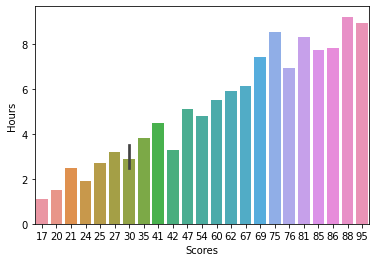

In [79]:
sns.barplot(x = 'Scores',y = 'Hours',data=data);

#### The scores have increased with an increase in the total nuber of hours

## Model Building

##### Splitting the data into train and test

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
y = data.Scores #Target
X = data.drop(['Scores'],axis = 1)

In [84]:
X_train, X_test,y_train,y_test = train_test_split(X,
                                                 y,test_size=0.2,
                                                 random_state=42)
                                                

##### Importing Linear Regression Model from sklearn

In [85]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

##### Plotting the coefficients and intercept

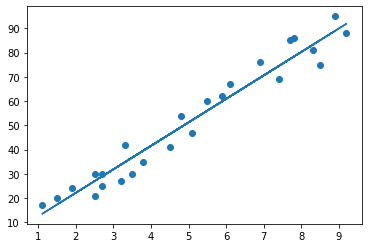

In [86]:
## y = mx + c
line = lm.coef_*X + lm.intercept_

# Plotting for the test data
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

##### Marking predictions on the test data

In [87]:
y_pred = lm.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [88]:
actual_vs_predicted = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_vs_predicted

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


##### Checking the difference between the actual and the predicted values

In [89]:
actual_vs_predicted['Difference'] = actual_vs_predicted.Actual - actual_vs_predicted.Predicted
actual_vs_predicted

,Actual,Predicted,Difference
8,81,83.188141,-2.188141
16,30,27.032088,2.967912
0,21,27.032088,-6.032088
23,76,69.633232,6.366768
11,62,59.951153,2.048847


##### Visualising the diffrence between the actual and predicted values

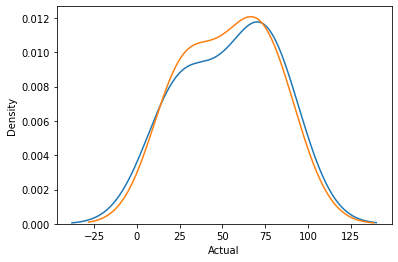

In [128]:
sns.kdeplot(actual_vs_predicted.Actual)
sns.kdeplot(actual_vs_predicted.Predicted)
xlabel = "Actual"
ylabel = "Prediction"

##### Very similar predictions

# Model Evaluation

In [129]:
from sklearn import metrics
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix,mean_absolute_error,mean_squared_error,r2_score

#checking reports

print('MAE',mean_absolute_error(y_test,y_pred))

print('MSE',mean_squared_error(y_test,y_pred))

print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

print('R2',r2_score(y_test,y_pred)*100)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


MAE 3.9207511902099244
MSE 18.943211722315272
RMSE 4.352380006653288
R2 96.78055545167994
Adjusted R^2: 0.9570740726890659


#### The model is 95.7% accurate

## Making predictions for score when total hours = 9.25

In [131]:
hours = 9.25

hours = np.array([[hours]],)

new_pred = lm.predict(hours)

print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494
